In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('Cole2023pitchdata.csv')

In [7]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [8]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,9/27/2023,96.1,-2.01,5.76,"Cole, Gerrit",666182,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,212,0.000,-0.100,NaN,NaN
1,SL,9/27/2023,89.2,-2.05,5.77,"Cole, Gerrit",666182,543037,NaN,ball,...,0,0,6,Strategic,Standard,137,0.000,0.012,NaN,NaN
2,FF,9/27/2023,96.9,-2.16,5.74,"Cole, Gerrit",666182,543037,NaN,called_strike,...,0,0,6,Strategic,Standard,213,0.000,-0.017,NaN,NaN
3,FC,9/27/2023,91.0,-2.07,5.82,"Cole, Gerrit",543807,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,180,-0.001,-0.169,NaN,NaN
4,FF,9/27/2023,97.1,-2.10,5.83,"Cole, Gerrit",595281,543037,strikeout,swinging_strike,...,0,0,6,Infield shade,Standard,208,-0.002,-0.214,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,FF,3/30/2023,96.7,-1.89,5.91,"Cole, Gerrit",624424,543037,NaN,foul,...,0,0,0,Standard,Standard,214,0.000,-0.054,NaN,NaN
3277,FF,3/30/2023,94.4,-1.74,6.03,"Cole, Gerrit",664774,543037,walk,ball,...,0,0,0,Infield shade,Standard,207,-0.036,0.155,NaN,NaN
3278,FF,3/30/2023,96.4,-1.67,6.03,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,222,0.000,0.135,NaN,NaN
3279,FF,3/30/2023,95.0,-1.69,6.07,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,208,0.000,0.064,NaN,NaN


c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


   pfx_x  pfx_z  cluster cluster_label
0  -0.65   1.52        5        sinker
1   0.42  -0.01        1      changeup
2  -0.77   1.42        0      fastball
3   0.50   0.70        4        cutter
4  -0.59   1.49        5        sinker


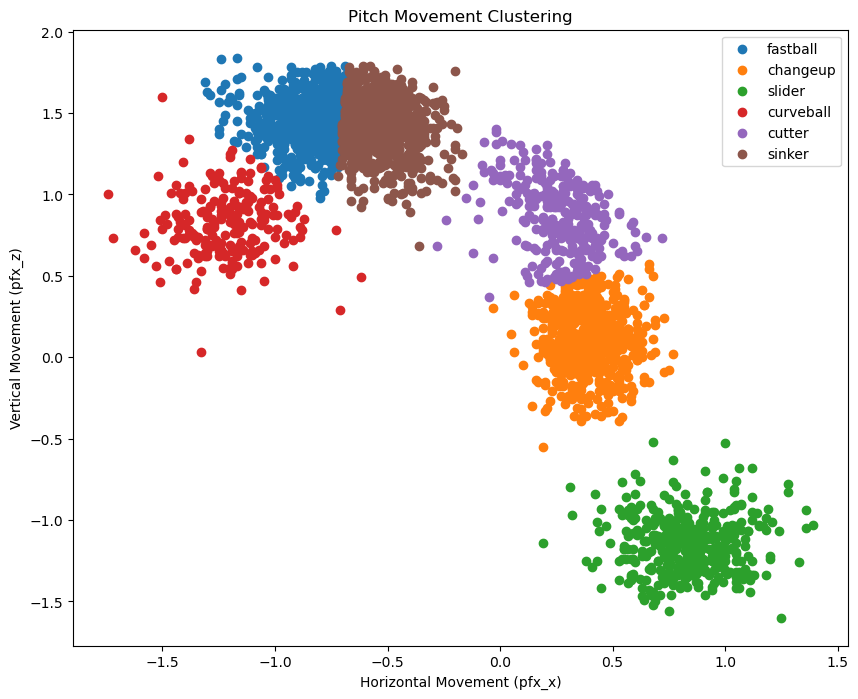

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df[['pfx_x_scaled', 'pfx_z_scaled']] = scaler.fit_transform(df[['pfx_x', 'pfx_z']])

# Run K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['pfx_x_scaled', 'pfx_z_scaled']])

cluster_labels = {
    0: 'fastball',
    1: 'changeup',
    2: 'slider',
    3: 'curveball',
    4: 'cutter',
    5: 'sinker'
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

print(df[['pfx_x', 'pfx_z', 'cluster', 'cluster_label']].head())

plt.figure(figsize=(10, 8))
for cluster, label in cluster_labels.items():
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(cluster_points['pfx_x'], cluster_points['pfx_z'], label=label)

plt.xlabel('Horizontal Movement (pfx_x)')
plt.ylabel('Vertical Movement (pfx_z)')
plt.title('Pitch Movement Clustering')
plt.legend()
plt.show()


c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

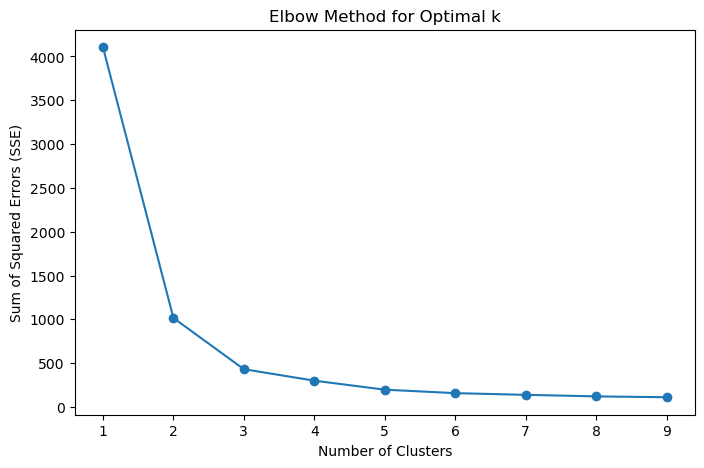

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_34740\1626749076.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_movement_data['cluster'] = kmeans.fit_predict(pitch_movement_data)


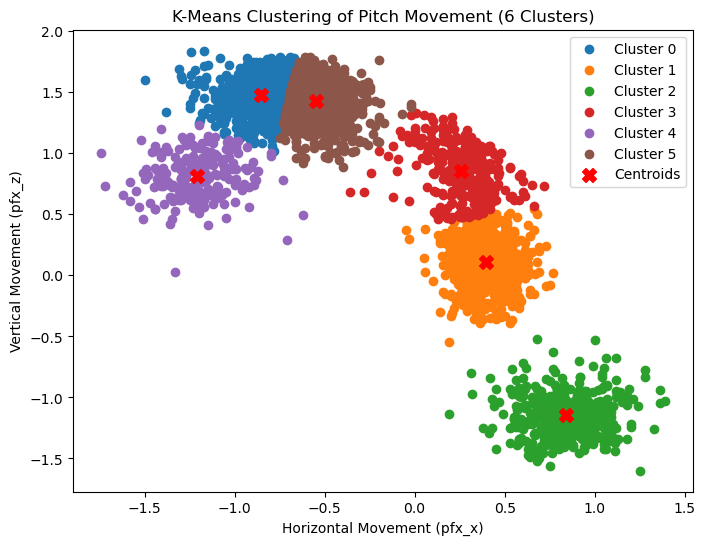

In [11]:
pitch_movement_data = df[['pfx_x', 'pfx_z']]

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pitch_movement_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve to choose the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pitch_movement_data['cluster'] = kmeans.fit_predict(pitch_movement_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = pitch_movement_data[pitch_movement_data['cluster'] == cluster]
    plt.scatter(cluster_data['pfx_x'], cluster_data['pfx_z'], label=f'Cluster {cluster}')

# Add the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.xlabel("Horizontal Movement (pfx_x)")
plt.ylabel("Vertical Movement (pfx_z)")
plt.title(f"K-Means Clustering of Pitch Movement ({optimal_k} Clusters)")
plt.legend()
plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


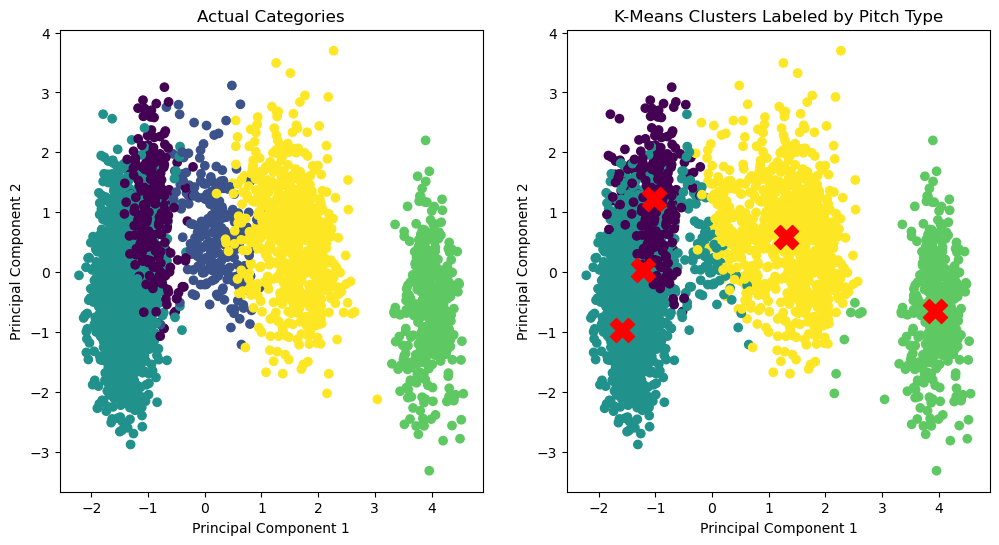

Adjusted Rand Index: 0.85
Accuracy: 0.91
Confusion Matrix:
 [[ 212    0   21    0    0]
 [   6    0   74    0  151]
 [  46    0 1692    0    0]
 [   0    0    0  396    0]
 [   0    0    0    8  675]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       233
           1       0.00      0.00      0.00       231
           2       0.95      0.97      0.96      1738
           3       0.98      1.00      0.99       396
           4       0.82      0.99      0.89       683

    accuracy                           0.91      3281
   macro avg       0.71      0.77      0.74      3281
weighted avg       0.85      0.91      0.87      3281



c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix, classification_report
from scipy.stats import mode

# Select features and target
features = ['pfx_x', 'pfx_z', 'release_speed', 'spin_axis', 'release_pos_x', 'release_pos_z']
X = df[features]
y = df['pitch_type']

# Encode categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 4 components to capture more variance
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means Clustering with 5 clusters, using a higher n_init for better stability
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=50, init='random', random_state=20)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

# Step 1: Map each cluster to the most common actual pitch type
cluster_labels = np.zeros_like(y_kmeans)
for i in range(n_clusters):  # Use n_clusters instead of hard-coded range
    mask = (y_kmeans == i)
    if np.sum(mask) > 0:  # Check if there are points in the cluster
        cluster_labels[mask] = mode(y_encoded[mask])[0]

# Decode the labels back to the original pitch types
decoded_cluster_labels = label_encoder.inverse_transform(cluster_labels)

# Plot the Actual Categories vs K-Means Clusters with Correct Labels
plt.figure(figsize=(12, 6))

# Plot Actual Categories
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis')
plt.title('Actual Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot K-Means Clusters with Correct Labels and Centroids
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clusters Labeled by Pitch Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 3: Evaluate the Clustering Performance with the New Labels
ari_score = adjusted_rand_score(y_encoded, cluster_labels)
print(f"Adjusted Rand Index: {ari_score:.2f}")

accuracy = accuracy_score(y_encoded, cluster_labels)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_encoded, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_encoded, cluster_labels))


c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


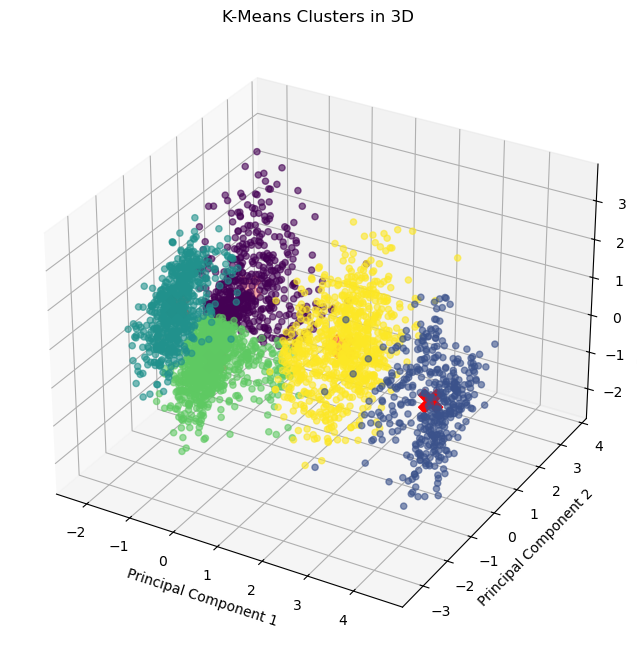

In [51]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means with the same centroids approach
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=50, random_state=20)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('K-Means Clusters in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


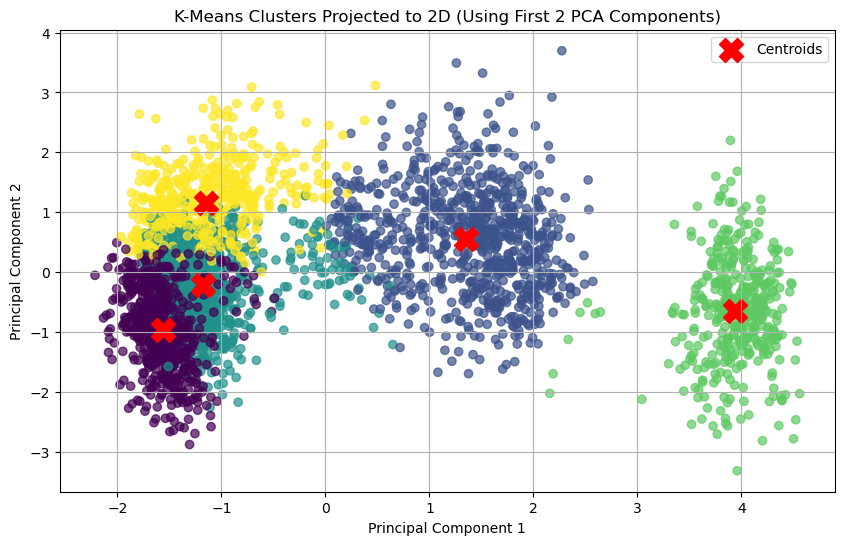

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df has already been loaded and processed
features = ['pfx_x', 'pfx_z', 'release_speed', 'spin_axis', 'release_pos_x', 'release_pos_z']
X = df[features]
y = df['pitch_type']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 3 components for clustering
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

# 2D Visualization using only the first 2 PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clusters Projected to 2D (Using First 2 PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix, classification_report
from scipy.stats import mode

# Step 1: Map each cluster to the most common actual pitch type
cluster_labels = np.zeros_like(y_kmeans)
for i in range(n_clusters):
    mask = (y_kmeans == i)
    if np.sum(mask) > 0:
        cluster_labels[mask] = mode(y_encoded[mask])[0]

# Step 2: Decode the labels back to the original pitch types
decoded_cluster_labels = label_encoder.inverse_transform(cluster_labels)

# Step 3: Evaluate the clustering performance
ari_score = adjusted_rand_score(y_encoded, cluster_labels)
accuracy = accuracy_score(y_encoded, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Step 4: Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_encoded, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_encoded, cluster_labels))


Adjusted Rand Index (ARI): 0.73
Accuracy: 0.86
Confusion Matrix:
 [[   0    0  233    0    0]
 [   0    0  109    0  122]
 [   0    0 1738    0    0]
 [   0    0    0  396    0]
 [   0    0    1    8  674]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       233
           1       0.00      0.00      0.00       231
           2       0.84      1.00      0.91      1738
           3       0.98      1.00      0.99       396
           4       0.85      0.99      0.91       683

    accuracy                           0.86      3281
   macro avg       0.53      0.60      0.56      3281
weighted avg       0.74      0.86      0.79      3281



c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


How well did the K-means do?



What were some striking features about K-means versus the actual result?

K-Means heavily favored the most frequent category (pitch type 2), resulting in nearly 100% recall for it but misclassifying others. Notably, it failed to classify categories 0 and 1, showing zero precision and recall. This suggests difficulty in distinguishing overlapping or less frequent pitch types. K-Means' assumption of spherical, equally-sized clusters likely led to misalignments, revealing its limitations with complex, imbalanced data.